# read the output given by https://github.com/Visceral-Project/EvaluateSegmentation

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [18]:
#path = '/home/gumougeot/all/data/3d_nucleus/all_manual/eval_metrics/'
#path = 'C:\\Users\\mezquitap\\Documents\\results\\'
path = '/home/mezquitap/dataset/results/'

#fnames = ['guillaume_gift','guillaume_otsu','otsu_sophie', 'sophie_gift', 'otsu_gift', 'guillaume_sophie', 'gift_cellpose', 'guillaume_cellpose', 'otsu_cellpose', 'sophie_cellpose', 'cellpose_deepcell', 'gift_deepcell', 'guillaume_deepcell', 'otsu_deepcell', 'sophie_deepcell', 'sophie_cyto', 'sophie_cyto2', 'sophie_nuclei', 'cellpose_qcanet', 'deepcell_qcanet', 'gift_qcanet', 'guillaume_qcanet', 'otsu_qcanet', 'sophie_qcanet', 'cyto2_nuclei', 'deepcell_cyto2', 'gift_cyto2', 'guillaume_cyto2', 'otsu_cyto2', 'qcanet_cyto2', 'cyto_cyto2', 'sophie_cyto2'] #, 'cellpose_deepcell', 'gift_deepcell', 'guillaume_deepcell', 'otsu_deepcell', 'sophie_deepcell', 'sophie_cyto', 'sophie_cyto2', 'sophie_nuclei'
#fnames = ['cellpose_qcanet', 'deepcell_qcanet', 'gift_qcanet', 'guillaume_qcanet', 'otsu_qcanet', 'sophie_qcanet']
#fnames = ['deepcell_stardist', 'gift_stardist', 'guillaume_stardist', 'otsu_stardist', 'qcanet_stardist', 'sophie_stardist', 'stardist_cyto2']
#fnames = ['otsu_sophie', 'sophie_cellpose', 'sophie_cyto2', 'sophie_deepcell', 'sophie_gift', 'sophie_qcanet', 'sophie_stardist']
#fnames = ['self_img_self_labels']
# fnames = ['otsu_sophie', 'sophie_cellpose', 'sophie_cyto2', 'sophie_deepcell', 'sophie_gift', 'sophie_qcanet', 'sophie_stardist']
fnames = ['sophie_cyto', 'sophie_cyto2', 'sophie_nuclei']



path_in = [path + f + '.txt' for f in fnames]
path_out = [path + f + '.csv' for f in fnames]
kw = [
    'DICE',
    'JACRD',
    'AUC',
    'KAPPA',
    'RNDIND',
    'ADJRIND',
    'ICCORR',
    'VOLSMTY',
    'MUTINF',
    'HDRFDST',
    # 'AVGDST:', # TODO: it is a special case...
    'AVGDIST',
    'bAVD',
    'MAHLNBS',
    'VARINFO',
    'GCOERR',
    #'PROBDST',
    'SNSVTY',
    'SPCFTY',
    'PRCISON',
    'FMEASR',
    'ACURCY',
    'FALLOUT',
    'TP',
    'FP',
    'TN',
    'FN',
    'REFVOL',
    'SEGVOL',
]

In [19]:
# read the files and stores them in a DataFrame
means = []
data_kw = []
for idx in range(len(fnames)):
    with open(path_in[idx], 'r') as f:
        lines = f.readlines()
    lines = lines[0].split("\\n")
    # stores the line in a csv file
    data = {}
    for l in lines: # read lines
        split = l.split(' ') # split the line
        for k in kw: # for each key words (=each metric)
            for i,s in enumerate(split): # for each split elements
                if s == k: # if the element is a valid metric
                    try: # add it to the data dictionary 
                        if k not in data_kw: data_kw += [k]
                        if k in data.keys():
                            data[k] += [float(split[i+2])]
                        else:
                            data[k] = [float(split[i+2])]
                        break
                    except ValueError:
                        print('[error] type error: ', split[i+2])
    df = pd.DataFrame(data)
    df.to_csv(path_out[idx], index=False)
    means += [df.mean()]

df_means = pd.DataFrame(means, index=fnames)
df_means.head(len(fnames))
df_means.to_csv(path+'means.csv')

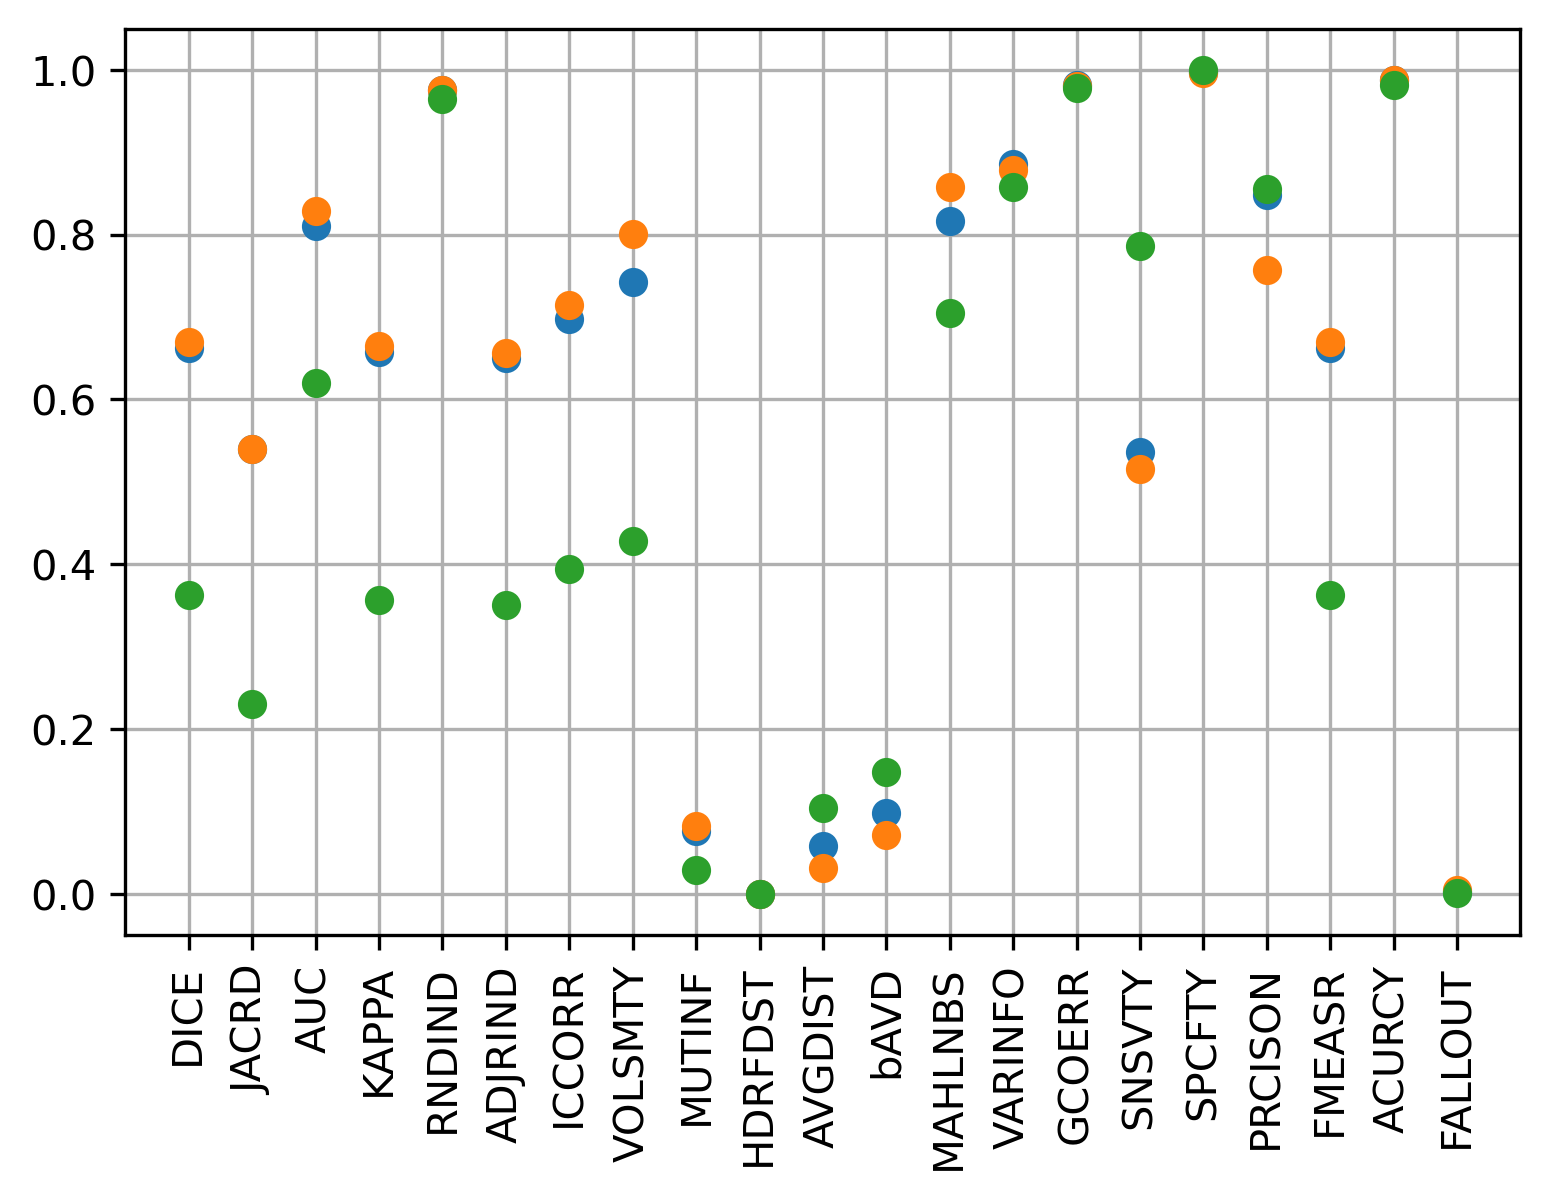

In [22]:
# visualize

data = np.array(df_means).transpose()
#del df_means['PROBDST']
# data = data / np.max(data,axis=1,keepdims=True) # normalize similarity
ds = 9 # distance index start
# data[ds:ds+7] = 1 - data[ds:ds+7] + np.min(data[ds:ds+7], axis=1, keepdims=True) # normalize distances
data[ds:ds+7] = np.exp(-data[ds:ds+7]) # normalize distances

t = np.arange(len(data))
dm = 21 # max display
plt.figure(dpi=300)
plt.plot(t[:dm], data[:dm], 'o')
plt.xticks(t[:dm], labels=data_kw[:dm], rotation=90)
# plt.legend(fnames)
plt.grid()
plt.show()
# np.arange()

In [113]:
# import seaborn as sns
# plt.figure(dpi=300)
# ax = sns.stripplot(data=df_means[kw[:21]])
# ax.set_xticks(t[:dm], labels=data_kw[:dm], rotation=90)
# plt.grid()
# plt.show()